# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[antoine.bedaton@ulb.be](mailto:antoine.bedaton@ulb.be) - Student ID 459482__
### Student 2 - __[pierre.defraene@ulb.be](mailto:pierre.defraene@ulb.be) - Student ID 463941__
### Student 3 - __[nathan.marotte@ulb.be](mailto:nathan.marotte@ulb.be) - Student ID 459274__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction

Using data from Taarifa and the Tanzanian Ministry of Water, we are asked to predict which pump are functional, non functional, or need some repairs. The data contains information about each pump (position, region name, population, type of payment, installator, etc ...) and comes in 3 files : 

- training_set_labels : Contains the list of all id followed by their status (functionning, non functionning or needing repairs)

- training_set_values : Contains all the information about each pump with their id that correspond to training_set_labels

- test_set_values : The same structure as training_set_values but for which the status is unknown and that we will have to predict.

First, we will preprocess the data to remove redundent or useless information. For exemple the name of the pump isn't really relevant for guessing if it is working or not, while the name of the constructor is.

Once we reduced the size of the input space, we will run our 3 models on the data, that is training_set_values with their status_group column added.

Our group chose the 3 following models : 

- Neural Network (nnet library)
- Decision Tree (rpart library)
- Random Forest (randomForest library)

We will also need the following libraries 

- Bedabrary
- LibraPierre
- Nadule

Uncomment and execute the following cell to install all the require libraries

todo ajouter version et input donnée

In [1]:
#library("tidyverse")
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [2]:
training_set_labels <- read.csv(file = 'data/training_set_labels.csv')
test_set_values <- read.csv(file = 'data/test_set_values.csv')
training_set_values <- read.csv(file = 'data/training_set_values.csv')

#training_set_labels
#summary(test_set_values)

# Data preprocessing

Before starting the modeling, we need to make sure to keep only the necessary data. In order to do that, we first started to check if there we columns that were 100% equals. To do so, we created a function called $check\_all\_equal$ that will create a combinaison of all the columns of the dataset and will compare them using the $identical$ R function. We noticed that only 2 columns were 100% equals, "quantity" and "quantity_group". Therefore, we decided to remove the "quantity_group" column.

After the first parsing done, we notice that there was still some culumns that were close from being equal but they sometimes differ in one word. For example, the column "payment" and "payment_type" are always the same, they just differ in the notation.




We will first look at all the columns and safely remove all the columns that only have 1 possibility for the row, for exemple in column `recorded_by`, the row is always `GeoData Consultants Ltd`. This can be checked with

In [3]:
for (colname in names(training_set_values)) {
    if (nrow(unique(training_set_values[colname])) == 1){
        print(paste("the column", colname, "has always the same value"))
    }
}
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"recorded_by")] # remove recorded_by
training_set_values


[1] "the column recorded_by has always the same value"


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.85632177,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.14746569,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.82132853,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.15529772,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.82535885,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.76558728,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0,2012-10-01,Dwsp,0,DWSP,33.36241,-3.76636472,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0,2012-10-09,Rwssp,0,DWE,32.62062,-4.22619802,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0,2012-11-03,Wateraid,0,Water Aid,32.71110,-5.14671181,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
46144,0,2011-08-03,Isingiro Ho,0,Artisan,30.62699,-1.25705061,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


Given the huge amount of data we have, we can also look through the column in which only one value appear most of the time, and drop the column if this number is very high. For exemple, in the column `num_private`, the value `0` appears the most in this dataset(58643/757), we could then simply assume that it is always 0. Considering that, this column don't give us very information and furthermore, we don't have a clear definition of this variable in this dataset.

In [4]:
table(training_set_values["num_private"] == 0)
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"num_private")] # remove num_private since no information


FALSE  TRUE 
  757 58643 

We can automate this process by looking at the difference between the number of occurences of the most and the least common value for all the columns

In [5]:
col_names <- names(training_set_values)
differences <- c()

for (colname in names(training_set_values)) {
   maximum <- max(table(training_set_values[colname]))
   minimum <- min(table(training_set_values[colname]))
   differences <- rbind(differences, (maximum-minimum)/59400)
}
df <- data.frame(col_names, differences)
names(differences) <- c('Difference', 'col_name')
df <- df[order(df$differences, decreasing=TRUE),]
head(df)


,col_names,differences
27,management_group,0.8742256
30,water_quality,0.8552357
31,quality_group,0.8518687
18,public_meeting,0.8026431
36,source_class,0.7662626
2,amount_tsh,0.7009764


As we can see, only `num_private` has a very high ratio of one value to the rest, so we will only remove the rows for that columns.
We will remove all the rows that contain the value that appears the most in the column `num_private`

In [6]:
#old_count <- nrow(training_set_values)

In [7]:
#argmax <- tail(names(sort(table(training_set_values$num_private))), 1)  # Finds the value that appear the most
#training_set_values = filter(training_set_values, num_private == argmax)  # Filter and keep all the values equal to one
#print(paste("The number of rows of the dataset has been reduced by", 100*(old_count - nrow(training_set_values))/59400, "%"))

## Missing value imputation

## Feature engineering

## Feature selection

In [8]:
options(repr.matrix.max.rows=10, repr.matrix.max.cols=100)
#Read the dataset to the variable training_set_labels

# Adds en empty column functional_need_repairs
#training_set_labels <- cbind(training_set_labels, "non_functional" = 0)
# Adds en empty column functional_need_repairs
#training_set_labels <- cbind(training_set_labels, "functional_need_repairs" = 0)
# Adds an empty column functional
#training_set_labels <- cbind(training_set_labels, "functional" = 0)

# Put 1 in the column depending on the status_group
#training_set_labels$non_functional <- ifelse(training_set_labels$status_group == "non functional", 1, 0)
#training_set_labels$functional_need_repairs <- ifelse(training_set_labels$status_group == "functional need repairs", 1, 0)
#training_set_labels$functional <- ifelse(training_set_labels$status_group == "functional", 1, 0)


# print("start")
# for (col1 in 2:ncol(training_set_values)-1) {
#     for (col2 in col1:ncol(training_set_values)) {
#         if (col1 != col2) {
# #             print(col1)
# #             print(col2)
# #             print(length(training_set_values[, col1]))
# #             print(length(training_set_values[, col2]))
#             print(table(training_set_values[, col1], training_set_values[, col2]))
#         }
#     }
# }


# interesting_column_name <- c(
#     c("waterpoint_type_group", "waterpoint_type"), 
#     c("source_type", "source_class"), 
#     c("source", "source_type"),
#     c("water_quality", "quality_group"),
#     c("quantity", "quantity_group"),
#     c("extraction_type", "extraction_group_type"),
#     c("extraction_type", "extraction_type_class")
#     c("payment", "payment_type"),
#     c("management", "management_group"),
#     c("region", "region_code"),
#     c("basin", "subvillage"))

 #table(training_set_values$waterpoint_type_group, training_set_values$waterpoint_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"waterpoint_type_group")]
 #table(training_set_values$source_type, training_set_values$source_class)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_class")]
 #table(training_set_values$source, training_set_values$source_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_type")]
 #table(training_set_values$water_quality, training_set_values$quality_group)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quality_group")]
 #table(training_set_values$quantity, training_set_values$quantity_group)  # equivalent, we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quantity_group")]
 #table(training_set_values$extraction_type, training_set_values$extraction_type_group)  # we can delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_group")]
 #table(training_set_values$extraction_type, training_set_values$extraction_type_class)  # We can delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_class")]
# table(training_set_values$payment, training_set_values$payment_type)  # equivalent,  we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"payement_type")]
 #table(training_set_values$management, training_set_values$management_group)  # we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"management_group")]
 #table(training_set_values$region, training_set_values$region_code)  # very correlated but some cities/code are ambigius
# table(training_set_values$basin, training_set_values$subvillage)  # not really correlated, keep


# head(training_set_values)
names(training_set_values)
length(names(training_set_values))
#training_set_values[-c(40, 38, 37, 33, 35, 26, 27, 31, 29, 14, 12)]
training_set_values
# subvillage > region 
training_set_labels


[1] "id"                "amount_tsh"        "date_recorded"    
 [4] "funder"            "gps_height"        "installer"        
 [7] "longitude"         "latitude"          "wpt_name"         
[10] "basin"             "subvillage"        "region"           
[13] "region_code"       "district_code"     "lga"              
[16] "ward"              "population"        "public_meeting"   
[19] "scheme_management" "scheme_name"       "permit"           
[22] "construction_year" "extraction_type"   "management"       
[25] "payment"           "payment_type"      "water_quality"    
[28] "quantity"          "source"            "waterpoint_type"

[1] 30

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,management,payment,payment_type,water_quality,quantity,source,waterpoint_type
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,vwc,pay annually,annually,soft,enough,spring,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,Other,,True,2010,gravity,wug,never pay,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,pay per bucket,per bucket,soft,enough,dam,communal standpipe multiple
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,,True,1986,submersible,vwc,never pay,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,,,True,0,gravity,other,never pay,never pay,soft,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10,2013-05-03,Germany Republi,1210,CES,37.16981,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,True,1999,gravity,water board,pay per bucket,per bucket,soft,enough,spring,communal standpipe
27263,4700,2011-05-07,Cefa-njombe,1212,Cefa,35.24999,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,True,1996,gravity,vwc,pay annually,annually,soft,enough,river,communal standpipe
37057,0,2011-04-11,,0,,34.01709,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,,False,0,swn 80,vwc,pay monthly,monthly,fluoride,enough,machine dbh,hand pump
31282,0,2011-03-08,Malec,0,Musa,35.86132,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,,True,0,nira/tanira,vwc,never pay,never pay,soft,insufficient,shallow well,hand pump


id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional
31282,functional


At this time, we have remove the column which gave less information or was redundant. Now, we want to look after the correlation between the value and the output

In [9]:
factor_variables <- which(sapply(training_set_values[1,],class)=="factor")
#factor_variables

only_num_var <- training_set_values[,-factor_variables]

#data_train
data_train <- cbind(only_num_var, training_set_labels[2])
data_train

summary(data_train)


id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,status_group
69572,6000,1390,34.93809,-9.856322,11,5,109,1999,functional
8776,0,1399,34.69877,-2.147466,20,2,280,2010,functional
34310,25,686,37.46066,-3.821329,21,4,250,2009,functional
67743,0,263,38.48616,-11.155298,90,63,58,1986,non functional
19728,0,0,31.13085,-1.825359,18,1,0,0,functional
...,...,...,...,...,...,...,...,...,...
60739,10,1210,37.16981,-3.253847,3,5,125,1999,functional
27263,4700,1212,35.24999,-9.070629,11,4,56,1996,functional
37057,0,0,34.01709,-8.750434,12,7,0,0,functional
31282,0,0,35.86132,-6.378573,1,4,0,0,functional


       id          amount_tsh         gps_height       longitude    
 Min.   :    0   Min.   :     0.0   Min.   : -90.0   Min.   : 0.00  
 1st Qu.:18520   1st Qu.:     0.0   1st Qu.:   0.0   1st Qu.:33.09  
 Median :37062   Median :     0.0   Median : 369.0   Median :34.91  
 Mean   :37115   Mean   :   317.7   Mean   : 668.3   Mean   :34.08  
 3rd Qu.:55657   3rd Qu.:    20.0   3rd Qu.:1319.2   3rd Qu.:37.18  
 Max.   :74247   Max.   :350000.0   Max.   :2770.0   Max.   :40.35  
    latitude        region_code   district_code     population     
 Min.   :-11.649   Min.   : 1.0   Min.   : 0.00   Min.   :    0.0  
 1st Qu.: -8.541   1st Qu.: 5.0   1st Qu.: 2.00   1st Qu.:    0.0  
 Median : -5.022   Median :12.0   Median : 3.00   Median :   25.0  
 Mean   : -5.706   Mean   :15.3   Mean   : 5.63   Mean   :  179.9  
 3rd Qu.: -3.326   3rd Qu.:17.0   3rd Qu.: 5.00   3rd Qu.:  215.0  
 Max.   :  0.000   Max.   :99.0   Max.   :80.00   Max.   :30500.0  
 construction_year                  statu

We need to transform also categorical variable with 'one-hot-encoding'. To do so, we will use `dummies` package  

In [10]:
install.packages('dummies')
library(dummies)

package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\natha\AppData\Local\Temp\RtmpoviYMy\downloaded_packages


dummies-1.5.6 provided by Decision Patterns



In [11]:
data_factor <- training_set_values[,factor_variables]

In [12]:
variables_to_keep <- c("funder","extraction_type")

data_factor_onehot <- dummy.data.frame(data_factor[,variables_to_keep], sep="_")

dim(data_factor_onehot)
data_factor_onehot[1:2,]

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

[1] 59400  1916

funder_,funder_0,funder_A/co Germany,funder_Aar,funder_Abas Ka,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abdala,funder_Abddwe,funder_Abdul,funder_Abood,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Act,funder_Act Mara,funder_Action Aid,funder_Action Contre La Faim,funder_Action In A,funder_Adap,funder_Adb,funder_Adf,funder_Adp,funder_Adp Bungu,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_Afdp,funder_Afric,funder_Africa,funder_Africa 2000 Network/undp,funder_Africa Amini Alama,funder_Africa Project Ev Germany,funder_African,funder_African 2000 Network,funder_African Barrick Gold,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Reflections Foundation,funder_African Relie,funder_Africaone Ltd,funder_Africare,funder_Afriican Reli,funder_Afroz Ismail,...,funder_World Bank,funder_World Bank/government,funder_World Vision,funder_World Vision/ Kkkt,funder_World Vision/adra,funder_World Vision/rc Church,funder_Worldvision,funder_Woyege,funder_Wrssp,funder_Wsdo,funder_Wsdp,funder_Wsdp & Sdg,funder_Wspd,funder_Wssp,funder_Wua,funder_Wua And Ded,funder_Wug And Ded,funder_Wvc,funder_Wvt,funder_Wwf,funder_Wwf / Fores,funder_Yaole,funder_Yasi Naini,funder_Yasini,funder_Yasini Selemani,funder_Zaben,funder_Zaburi And Neig,funder_Zao,funder_Zao Water Spring,funder_Zao Water Spring X,funder_Zinduka,funder_Zingibali Secondary,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


In [13]:
#install decision tree
install.packages("rpart")
install.packages("rpart.plot")

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\natha\AppData\Local\Temp\RtmpoviYMy\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\natha\AppData\Local\Temp\RtmpoviYMy\downloaded_packages


Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,status_group
69572,6000,1390,34.93809,-9.856322,11,5,109,1999,functional
8776,0,1399,34.69877,-2.147466,20,2,280,2010,functional
34310,25,686,37.46066,-3.821329,21,4,250,2009,functional
67743,0,263,38.48616,-11.155298,90,63,58,1986,non functional
19728,0,0,31.13085,-1.825359,18,1,0,0,functional
...,...,...,...,...,...,...,...,...,...
60739,10,1210,37.16981,-3.253847,3,5,125,1999,functional
27263,4700,1212,35.24999,-9.070629,11,4,56,1996,functional
37057,0,0,34.01709,-8.750434,12,7,0,0,functional
31282,0,0,35.86132,-6.378573,1,4,0,0,functional


id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
...,...
39307,non functional
18990,functional
28749,functional
33492,functional


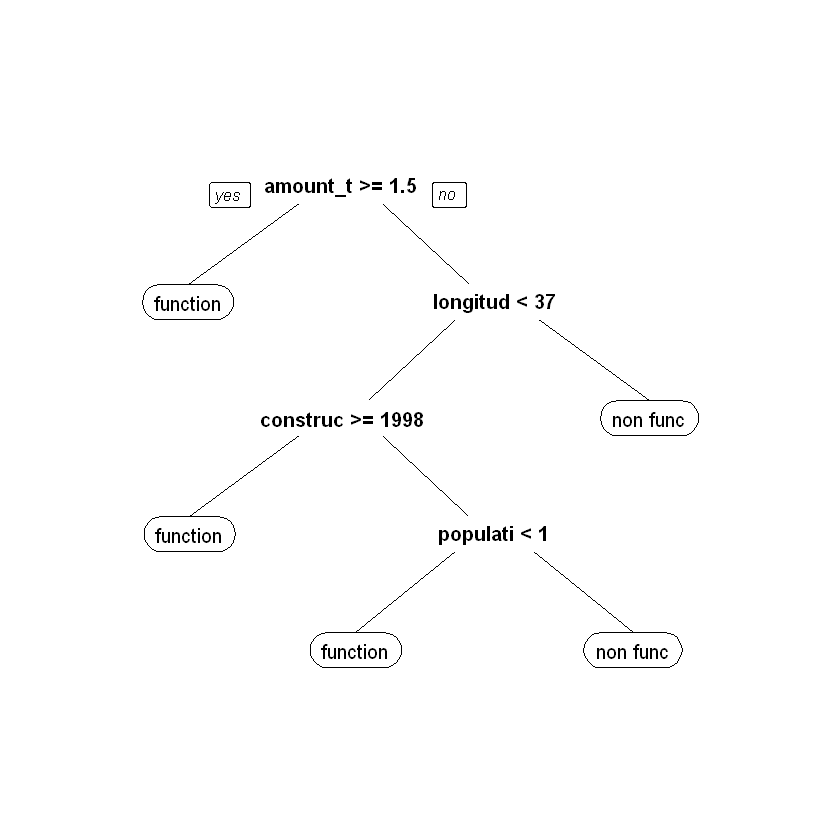

In [14]:

library(rpart)
library(rpart.plot)

data_train

# example model 

#DS <- cbind(X, functionnal=Y)
#data_train doit encore être défini data input + status_group

model<- rpart(status_group~., data= data_train, method = 'class') # what we need to change according of the model

prp(model)

predict_unseen <- predict(model,test_set_values, type = 'class')

status_group <-predict_unseen

data_predict <- test_set_values


data_predict <- cbind(data_predict[1],status_group)

data_predict

#write.csv(data_predict,"decisionTree.csv",row.names = FALSE)







We will also try to make the prediction with neural networks.

In [15]:
install.packages("nnet")


  There is a binary version available but the source version is later:
     binary source needs_compilation
nnet 7.3-15 7.3-16              TRUE

  Binaries will be installed
package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\natha\AppData\Local\Temp\RtmpoviYMy\downloaded_packages


In [16]:
library(nnet)

data_train

# example model 

#DS <- cbind(X, functionnal=Y)
#data_train doit encore être défini data input + status_group

nnet_model <- nnet(status_group~., data= data_train, size = 8, decay=5e-4, maxit=200) # what we need to change according of the model


predict_unseen <- predict(nnet_model, test_set_values, type= 'class')

status_group <-predict_unseen

nnet_data_predict <- cbind(data_predict[1],status_group)

nnet_data_predict

table(nnet_data_predict["status_group"] == "functional")

#write.csv(nnet_data_predict,"NeuralNetwork.csv",row.names = FALSE)

Warning message:
"package 'nnet' was built under R version 3.6.3"

id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,status_group
69572,6000,1390,34.93809,-9.856322,11,5,109,1999,functional
8776,0,1399,34.69877,-2.147466,20,2,280,2010,functional
34310,25,686,37.46066,-3.821329,21,4,250,2009,functional
67743,0,263,38.48616,-11.155298,90,63,58,1986,non functional
19728,0,0,31.13085,-1.825359,18,1,0,0,functional
...,...,...,...,...,...,...,...,...,...
60739,10,1210,37.16981,-3.253847,3,5,125,1999,functional
27263,4700,1212,35.24999,-9.070629,11,4,56,1996,functional
37057,0,0,34.01709,-8.750434,12,7,0,0,functional
31282,0,0,35.86132,-6.378573,1,4,0,0,functional


# weights:  107
initial  value 76557.553508 
iter  10 value 52592.668320
iter  20 value 52143.114014
iter  30 value 52095.485072
iter  40 value 51959.237680
iter  50 value 51851.822573
iter  60 value 51848.127696
iter  70 value 51838.675822
iter  80 value 51826.324260
iter  90 value 51813.125573
iter 100 value 51792.578320
iter 110 value 51742.327942
iter 120 value 51735.530375
iter 130 value 51733.896408
iter 140 value 51730.443636
iter 150 value 51726.597344
iter 160 value 51725.508102
iter 170 value 51722.270448
iter 180 value 51720.890483
iter 190 value 51720.067697
iter 200 value 51719.780462
final  value 51719.780462 
stopped after 200 iterations


id,status_group
50785,functional
51630,functional
17168,functional
45559,functional
49871,functional
...,...
39307,functional
18990,functional
28749,functional
33492,functional



FALSE  TRUE 
    1 14849 

In [17]:
predict_unseen <- predict(nnet_model,only_num_var, type= 'class')

In [18]:
results <- table(ifelse(predict_unseen == training_set_labels$status_group, "true", "false"))
results["true"]/(results["true"]+results["false"])

id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
69572,6000,1390,34.93809,-9.856322,11,5,109,1999
8776,0,1399,34.69877,-2.147466,20,2,280,2010
34310,25,686,37.46066,-3.821329,21,4,250,2009
67743,0,263,38.48616,-11.155298,90,63,58,1986
19728,0,0,31.13085,-1.825359,18,1,0,0
9944,20,0,39.17280,-4.765587,4,8,1,2009


[1] "functional" "functional" "functional" "functional" "functional"
[6] "functional"

id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
9944,functional


true 
0.5431987

We will also look after the lazy model

In [19]:
install.packages('lazy')

package 'lazy' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\natha\AppData\Local\Temp\RtmpoviYMy\downloaded_packages


In [20]:
library(lazy)

model<- lazy(status_group~., data= data_train) # what we need to change according of the model


predict_unseen <- predict(model,test_set_values, type = 'class')

predict_unseen

status_group <-predict_unseen

data_predict <- test_set_values


data_predict <- cbind(data_predict[1],status_group)

#table(data_predict["status_group"] == "functional")

data_predict

#write.csv(data_predict,"lazy.csv",row.names = FALSE)

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"

$h
    [1]  2.073517e+00  1.451232e+00  1.173736e+00  2.449443e+00  1.554772e+00
    [6]  2.143512e+00  1.598650e+00  2.948526e+00  2.758691e+00  1.197193e+00
   [11]  1.244513e+00  2.052628e+00  1.800586e+00  1.997958e+00  1.419141e+00
   [16]  1.314235e+00  3.844618e+00  2.462589e+00  1.712346e+00  2.750272e+00
   [21]  1.265109e+00  1.735757e+00  2.170777e+00  2.794934e+00  1.772956e+00
   [26]  1.488572e+00  2.940390e+00  1.031599e+00  1.669911e+00  1.967677e+00
   [31]  6.208169e-01  1.825280e+00  2.002850e+00  1.320915e+00  1.875846e+00
   [36]  8.699608e-01  4.208452e+00  1.056654e+00  2.500994e+00  1.652531e+00
   [41]  2.103285e+00  2.315834e+00  1.940206e+00  1.837177e+00  1.939732e+00
   [46]  1.982934e+00  1.887570e+00  1.689607e+00  2.086999e+00  1.731775e+00
   [51]  1.616797e+00  2.613824e+00  1.269865e+00  2.182253e+00  2.033974e+00
   [56]  1.319440e+00  1.320715e+00  2.632534e+00  1.845052e+00  1.223367e+00
   [61]  1.916246e+00  1.768828e+00  1.436522e+00  2.171595e+00  2.621588e+00
   [66]  1.222018e+00  2.410327e+00  2.832370e+00  1.349894e+00  6.693051e-01
   [71]  2.480368e+00  2.332361e+00  1.490627e+00  1.232483e+00  2.841036e+00
   [76]  1.857678e+00 -3.246883e-01  1.377013e+00  1.597287e+00  2.440688e+00
   [81]  1.300159e+00  1.707286e+00  1.943611e+00  1.858622e+00  1.354618e+00
   [86]  2.113770e+00  1.626553e+00  1.941855e+00  3.072026e+00  1.710784e+00
   [91]  1.281397e+00  1.553772e+00  2.228948e+00  3.503701e+00  1.034886e+00
   [96]  2.030995e+00  1.574907e+00  1.136319e+00  1.921344e+00  1.982981e+00
  [101]  2.587739e+00  1.783466e+00  1.621933e+00  1.436750e+00  2.637384e+00
  [106]  1.760368e+00  1.948713e+00  2.094817e+00  1.574163e+00  2.220818e+00
  [111]  1.625163e+00  1.917226e+00  1.204948e+00  1.328380e+00  1.736576e+00
  [116]  2.410453e+00  1.733520e+00  1.723575e+00  2.150806e+00  1.839761e+00
  [121]  2.308610e+00  1.633098e+00  2.844269e+00  1.814990e+00  1.428736e+00
  [126]  1.656317e+00  1.914136e+00  1.353787e+00  2.283305e+00  1.854379e+00
  [131]  8.660589e-01  1.854403e+00  2.018793e+00  3.074675e+00  1.527752e+00
  [136]  2.140715e+00  1.666677e+00  1.964872e+00  1.027722e+00  2.301533e+00
  [141]  1.279693e+00  1.785854e+00  2.588319e+00  2.368278e+00  1.962872e+00
  [146]  1.533124e+00  1.765928e+00  1.996268e+00  1.522135e+00  2.228273e+00
  [151]  2.000747e+00  1.413210e+00  1.536279e+00  1.695047e+00  1.624554e+00
  [156]  2.337176e+00  2.022019e+00  2.151575e+00  3.819594e-01  2.184295e+00
  [161]  1.587954e+00  2.433578e+00  2.968369e+00  2.869183e+00  1.612834e+00
  [166]  2.250244e+00  1.919995e+00  1.378499e+00  1.876672e+00  7.355511e-01
  [171]  1.605114e+00  1.779064e+00  2.299762e+00  1.971014e+00  2.268998e+00
  [176]  2.028833e+00  1.951908e+00  2.877824e+00  1.182227e+00  9.064977e-01
  [181]  2.810108e+00  1.165476e+00  1.572224e+00  1.636382e+00  1.406100e+00
  [186]  2.076832e+00  1.957350e+00  2.211364e+00  1.578174e+00  1.940443e+00
  [191]  2.127987e+00  1.513732e+00  1.476838e+00  9.528452e-01  1.711849e+00
  [196]  2.043173e+00  1.431553e+00  2.446684e+00  1.384803e+00  3.169912e+00
  [201]  1.889641e+00  1.774922e+00  1.921110e+00  2.659901e+00  2.006753e+00
  [206]  2.001417e+00  2.787409e+00  1.839793e+00  2.082688e+00  9.165554e-01
  [211]  2.020153e+00  2.656846e+00  2.462420e+00  2.146097e+00  3.037379e+00
  [216]  1.205532e+00  1.918930e+00  1.409094e+00  1.018545e+00  1.756878e+00
  [221]  2.071832e+00  2.416219e+00  2.063513e+00  1.441738e+00  2.444589e+00
  [226]  1.920151e+00  9.898645e-01  1.368880e+00  1.813328e+00  1.440219e+00
  [231]  2.875171e+00  2.290454e+00  2.117272e+00  2.036349e+00  2.214943e+00
  [236]  1.086731e+00  1.671393e+00  1.359922e+00  2.310723e-01  7.670454e-01
  [241]  1.855568e+00  2.343470e+00  2.466814e+00  1.502807e+00  2.056934e+00
  [246]  1.129565e+00  1.479645e+00  1.949752e+00  7.871979e-01  1.926027e+00
  [251]  1.418007e+00  2.059029e+00  1.817420e+00  1.109190e+00  1.214395e+00
  [256]  1.228300e+

id,h
50785,2.073517
51630,1.451232
17168,1.173736
45559,2.449443
49871,1.554772
...,...
39307,2.936169
18990,1.160669
28749,1.167073
33492,1.898517


# Alternative models





# Conclusions